In [1]:
library(readr)      # для чтения CSV
library(ggplot2)    # для визуализаций

In [19]:
df <- read_csv("/content/Student_Performance.csv")
head(df)

Rows: 10000 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Extracurricular Activities
dbl (5): Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
7,99,Yes,9,1,91
4,82,No,4,2,65
8,51,Yes,7,2,45
5,52,Yes,5,2,36
7,75,No,8,5,66
3,78,No,9,6,61


In [20]:
str(df)
summary(df)

spc_tbl_ [10,000 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Hours Studied                   : num [1:10000] 7 4 8 5 7 3 7 8 5 4 ...
 $ Previous Scores                 : num [1:10000] 99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular Activities      : chr [1:10000] "Yes" "No" "Yes" "Yes" ...
 $ Sleep Hours                     : num [1:10000] 9 4 7 5 8 9 5 4 8 4 ...
 $ Sample Question Papers Practiced: num [1:10000] 1 2 2 2 5 6 6 6 2 0 ...
 $ Performance Index               : num [1:10000] 91 65 45 36 66 61 63 42 61 69 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Hours Studied` = col_double(),
  ..   `Previous Scores` = col_double(),
  ..   `Extracurricular Activities` = col_character(),
  ..   `Sleep Hours` = col_double(),
  ..   `Sample Question Papers Practiced` = col_double(),
  ..   `Performance Index` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


 Hours Studied   Previous Scores Extracurricular Activities  Sleep Hours   
 Min.   :1.000   Min.   :40.00   Length:10000               Min.   :4.000  
 1st Qu.:3.000   1st Qu.:54.00   Class :character           1st Qu.:5.000  
 Median :5.000   Median :69.00   Mode  :character           Median :7.000  
 Mean   :4.993   Mean   :69.45                              Mean   :6.531  
 3rd Qu.:7.000   3rd Qu.:85.00                              3rd Qu.:8.000  
 Max.   :9.000   Max.   :99.00                              Max.   :9.000  
 Sample Question Papers Practiced Performance Index
 Min.   :0.000                    Min.   : 10.00   
 1st Qu.:2.000                    1st Qu.: 40.00   
 Median :5.000                    Median : 55.00   
 Mean   :4.583                    Mean   : 55.22   
 3rd Qu.:7.000                    3rd Qu.: 71.00   
 Max.   :9.000                    Max.   :100.00   

In [21]:
# Построение модели множественной регрессии
model <- lm(`Performance Index` ~ `Previous Scores` + `Sleep Hours` + `Sample Question Papers Practiced`, data = df)
summary(model)


Call:
lm(formula = `Performance Index` ~ `Previous Scores` + `Sleep Hours` + 
    `Sample Question Papers Practiced`, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.105  -6.408  -0.004   6.380  19.579 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -19.388873   0.447832 -43.295   <2e-16 ***
`Previous Scores`                    1.013243   0.004423 229.093   <2e-16 ***
`Sleep Hours`                        0.481777   0.045230  10.652   <2e-16 ***
`Sample Question Papers Practiced`   0.240438   0.026751   8.988   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.67 on 9996 degrees of freedom
Multiple R-squared:  0.8407,	Adjusted R-squared:  0.8406 
F-statistic: 1.758e+04 on 3 and 9996 DF,  p-value: < 2.2e-16


In [22]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
# Дополнительные метрики
predictions <- predict(model, df)
residuals <- df$`Performance Index` - predictions
mse <- mean(residuals^2)
mse

# install.packages("Metrics")
library(Metrics)
mse_val <- mse(df$`Performance Index`, predictions)
r2_val <- summary(model)$r.squared
print(paste("MSE =", mse_val))
print(paste("R^2 =", r2_val))


[1] 58.80301

[1] "MSE = 58.8030122174063"
[1] "R^2 = 0.840679143992356"


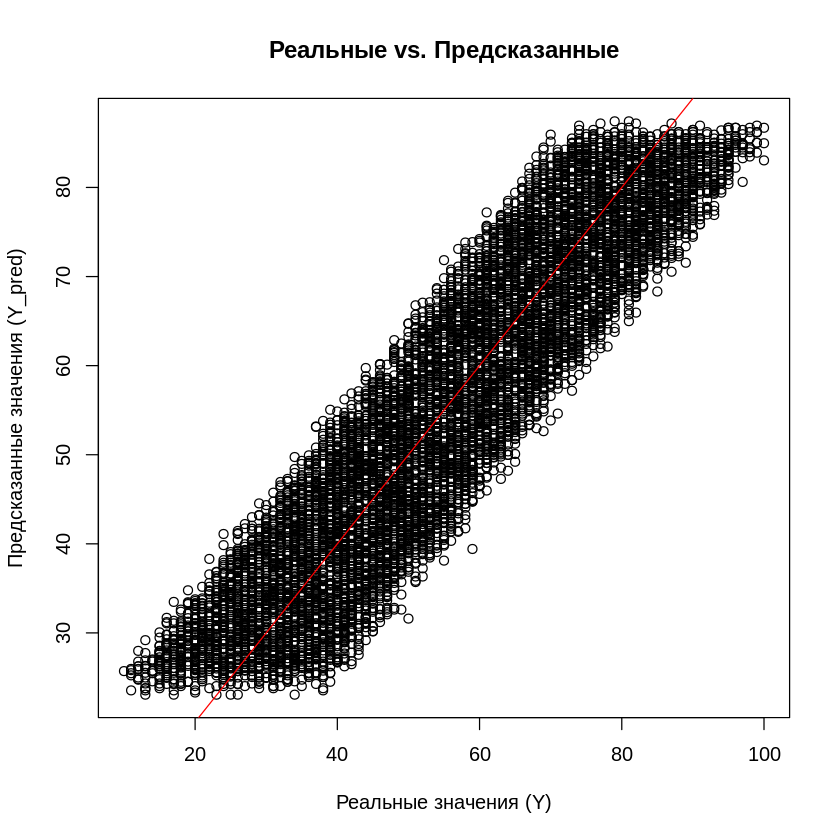

In [27]:
# График предсказанных vs. реальных
predictions <- predict(model, df)
plot(df$`Performance Index`, predictions,
xlab = "Реальные значения (Y)",
ylab = "Предсказанные значения (Y_pred)",
main = "Реальные vs. Предсказанные")
abline(a=0, b=1, col="red")

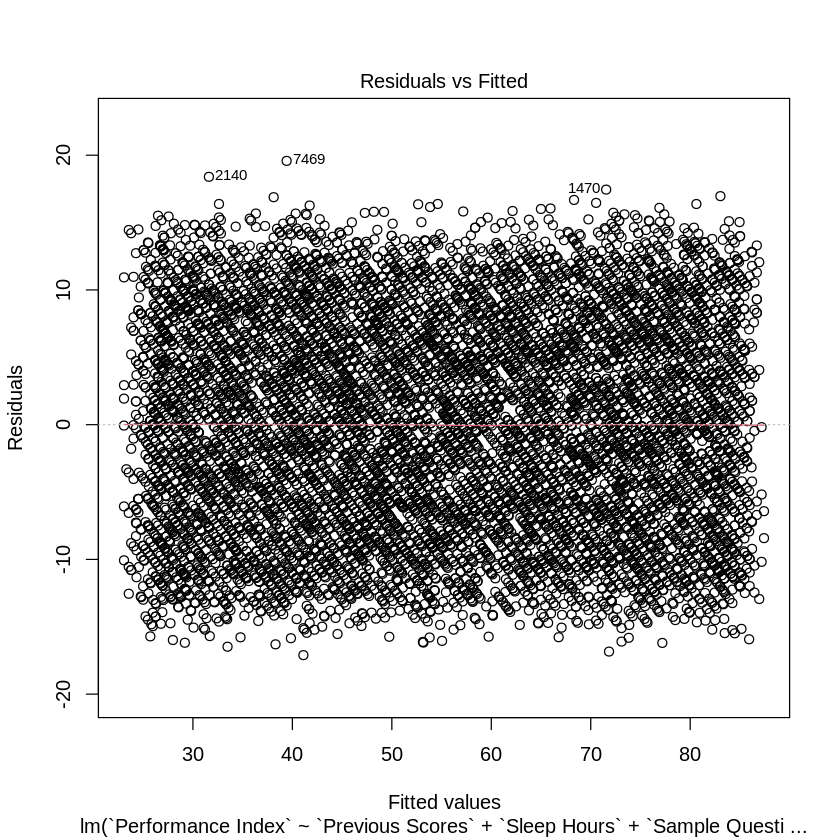

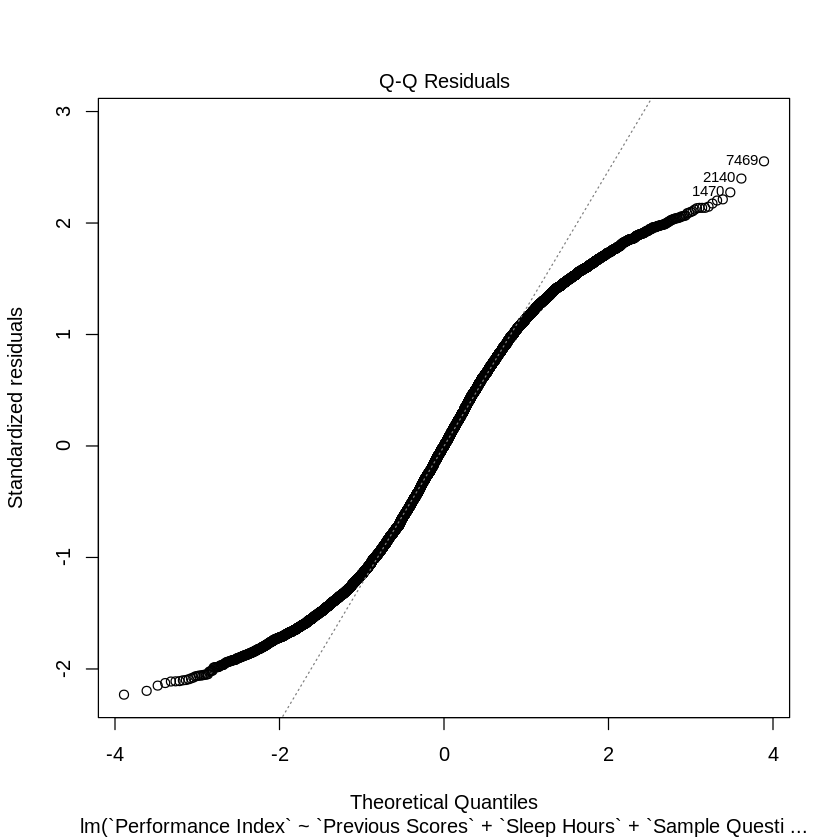

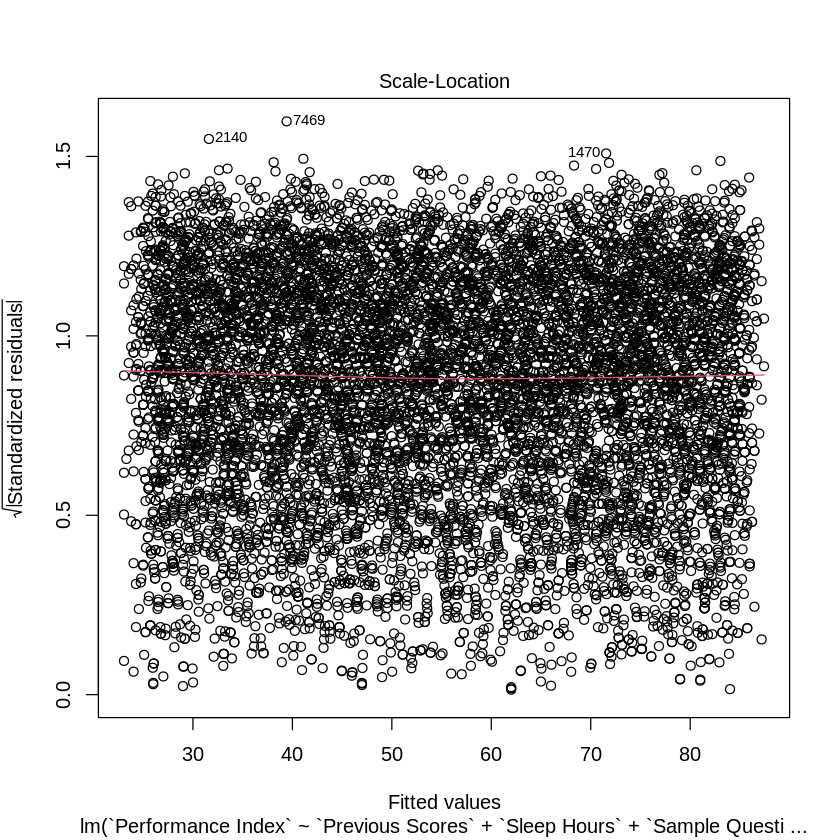

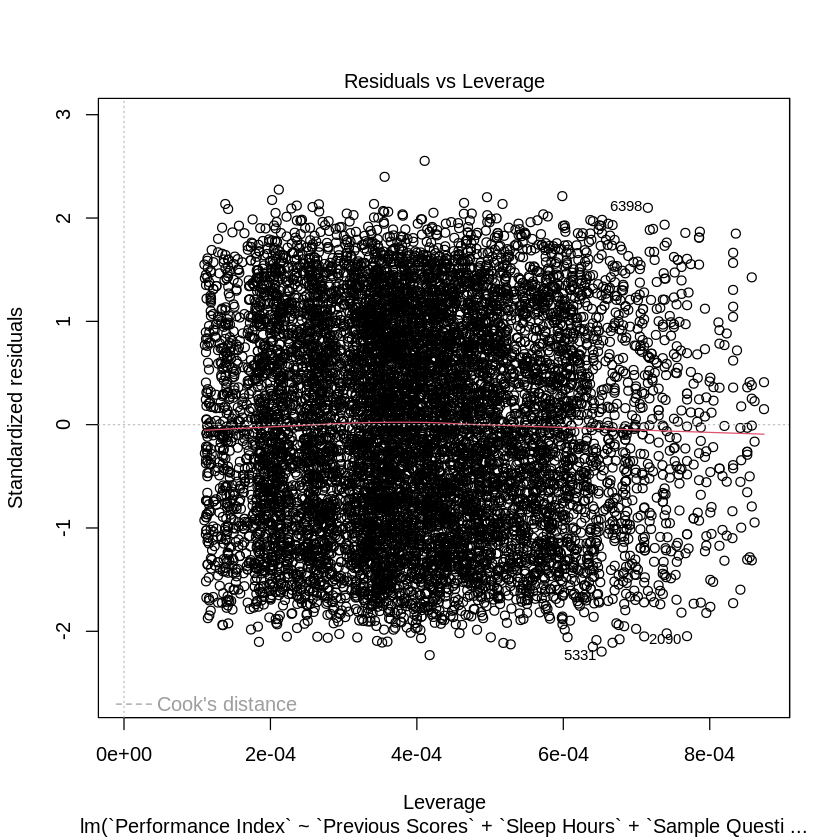

In [28]:
# Диаграммы остатков (базовые)
plot(model)